In [74]:
#Import library
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [75]:
#Read File 
df = pd.read_csv("Credit.csv", index_col=0)

In [76]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [77]:
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler

In [78]:
df.shape

(400, 11)

<AxesSubplot:>

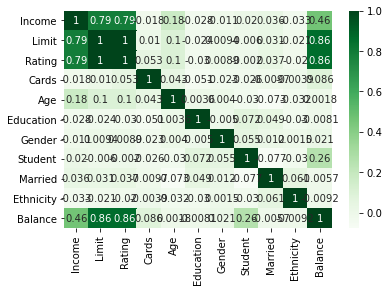

In [79]:
sns.heatmap(credit_df.corr(), cmap ="Greens", annot=True)

In [80]:
#Linear Regression Model

In [81]:
#Encoder the categorical variabel 
from sklearn.preprocessing import LabelEncoder

In [82]:
le = LabelEncoder()

In [83]:
var = ["Gender","Student","Married","Ethnicity"]

In [84]:
f = lambda x : le.fit_transform(x)

In [85]:
df[var] = df[var].apply(f)

In [86]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,0,1,2,333
2,106.025,6645,483,3,82,15,1,1,1,1,903
3,104.593,7075,514,4,71,11,0,0,0,1,580
4,148.924,9504,681,3,36,11,1,0,0,1,964
5,55.882,4897,357,2,68,16,0,0,1,2,331


C:\Users\nhung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

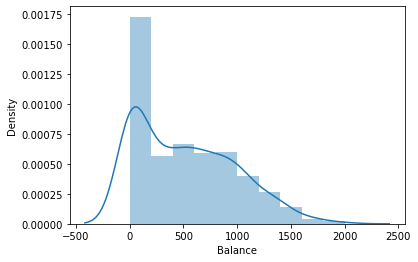

In [87]:
sns.distplot(df.Balance)

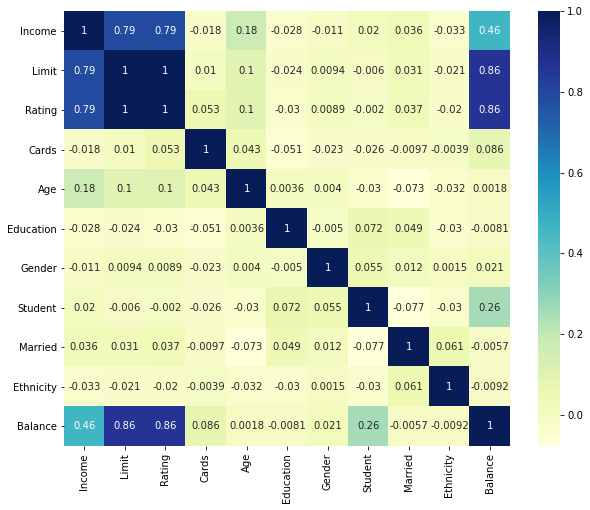

In [92]:
#Build model lineear regression
#correlation all variabel 
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap ="YlGnBu", annot = True);

In [95]:
credit_df= df['Active'] = np.where(df['Balance']>0, 'Yes', 'No')  
df.Active.describe()

count     400
unique      2
top       Yes
freq      310
Name: Active, dtype: object

In [106]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(df.Balance, df.Limit)
msg = "Correlation coefficient Balance-Limit: {}\n p-value: {}\n"
print(msg.format(r1, p1))
r2, p2 = pearsonr(df.Balance, df.Rating)
msg = "Correlation coefficient Balance-Rating: {}\n p-value: {}\n"
print(msg.format(r2, p2))
r3, p3 = pearsonr(df.Balance, df.Income)
msg = "Correlation coefficient Balance-Income: {}\n p-value: {}\n"
print(msg.format(r3, p3))
r4, p4 = pearsonr(df.Limit, df.Rating)
msg = "Correlation coefficient Limit-Rating: {}\n p-value: {}\n"
print(msg.format(r4, p4))
r5, p5 = pearsonr(df.Limit, df.Income)
msg = "Correlation coefficient Limit-Income: {}\n p-value: {}\n"
print(msg.format(r5, p5))
r6, p6 = pearsonr(df.Rating, df.Income)
msg = "Correlation coefficient Rating-Income: {}\n p-value: {}\n"
print(msg.format(r6, p6))

r7, p7 = pearsonr(df.Balance, df.Gender)
msg = "Correlation coefficient Balance-Gender: {}\n p-value: {}\n"
print(msg.format(r7, p7))

r8, p8 = pearsonr(df.Balance, df.Married)
msg = "Correlation coefficient Balance-Married: {}\n p-value: {}\n"
print(msg.format(r8, p8))


Correlation coefficient Balance-Limit: 0.8616972670153955
 p-value: 2.5305807117122616e-119

Correlation coefficient Balance-Rating: 0.8636251606214953
 p-value: 1.8988990970393693e-120

Correlation coefficient Balance-Income: 0.4636564570157574
 p-value: 1.030885802589071e-22

Correlation coefficient Limit-Rating: 0.9968797370016825
 p-value: 0.0

Correlation coefficient Limit-Income: 0.7920883413369415
 p-value: 2.3917894422844805e-87

Correlation coefficient Rating-Income: 0.7913776251121216
 p-value: 4.36269144308956e-87

Correlation coefficient Balance-Gender: 0.02147400671733864
 p-value: 0.6685161055026916

Correlation coefficient Balance-Married: -0.00567349021723996
 p-value: 0.9099388989450072



In [96]:
credit_df.shape

(400,)

Ethnicity
0    AxesSubplot(0.555556,0.125;0.344444x0.328261)
1    AxesSubplot(0.555556,0.125;0.344444x0.328261)
2    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

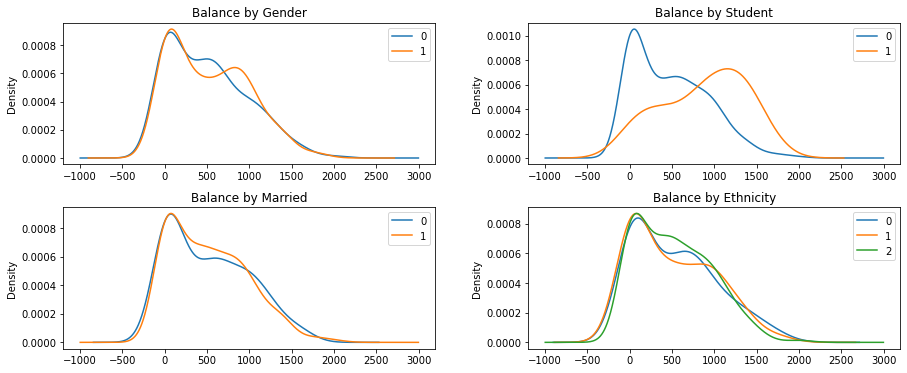

In [100]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')


In [50]:
#Split data train/test
data_train, data_test = train_test_split(credit_df, train_size=0.8, test_size =0.2, random_state = 100)

In [51]:
data_train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
191,0.254328,0.344387,0.328459,0.375,0.360000,0.800000,1.0,0.0,1.0,1.0,0.269135
47,0.052059,0.320723,0.318335,0.125,0.546667,0.733333,1.0,1.0,1.0,0.5,0.620810
51,0.147538,0.331444,0.318335,0.250,0.346667,0.666667,0.0,0.0,1.0,0.0,0.327164
378,0.100919,0.054526,0.055118,0.250,0.373333,0.333333,0.0,0.0,1.0,1.0,0.000000
122,0.781291,0.559197,0.569179,0.125,0.800000,0.533333,0.0,0.0,1.0,1.0,0.227114


In [377]:
data_train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
191,0.254328,0.344387,0.328459,0.375,0.360000,0.800000,1.0,0.0,1.0,1.0,0.269135
47,0.052059,0.320723,0.318335,0.125,0.546667,0.733333,1.0,1.0,1.0,0.5,0.620810
51,0.147538,0.331444,0.318335,0.250,0.346667,0.666667,0.0,0.0,1.0,0.0,0.327164
378,0.100919,0.054526,0.055118,0.250,0.373333,0.333333,0.0,0.0,1.0,1.0,0.000000
122,0.781291,0.559197,0.569179,0.125,0.800000,0.533333,0.0,0.0,1.0,1.0,0.227114


In [107]:
#Chane More input varience
#X_train = data_train[["Income","Limit","Rating","Cards","Age","Education","Student","Married","Ethnicity","Gender"]]
X_train = data_train[["Income","Rating","Cards","Age","Education","Student","Married","Ethnicity","Gender"]]

In [108]:
X_test = data_test[["Income","Rating","Cards","Age","Education","Student","Married","Ethnicity","Gender"]]

In [118]:
print("Data train shape: ", X_train.shape)
print("Data test shape: ", X_test.shape)

Data train shape:  (320, 9)
Data test shape:  (80, 9)


In [110]:
y_train = data_train.pop("Balance")

In [111]:
y_train.shape

(320,)

In [112]:
X_train.shape

(320, 9)

In [113]:
X_test.shape

(80, 9)

In [115]:
X_train.shape

(320, 9)

In [336]:
y_train.shape

(320,)

In [116]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [117]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     643.6
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          8.90e-195
Time:                        12:23:17   Log-Likelihood:                 497.11
No. Observations:                 320   AIC:                            -974.2
Df Residuals:                     310   BIC:                            -936.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1370      0.014     -9.934      0.000      -0.164      -0.110
Income        -0.6715      0.025    -26.853      0.000      -0.721      -0.622
Rating         1.7609      0.028     62.504      0.000       1.705       1.816
Cards          0.0131      0.017      0.761      0.447      -0.021       0.047
Age           -0.0244      0.013     -1.849      0.065      -0.050       0.002
Education      0.0024      0.014      0.172      0.864      -0.025       0.029
Student        0.2138      0.010     21.845      0.000       0.195       0.233
Married       -0.0026      0.006     -0.426      0.670      -0.014       0.009
Ethnicity      0.0006      0.007      0.084      0.933      -0.013       0.015
Gender        -0.0063      0.006     -1.071      0.285      -0.018       0.005
==============================================================================
Omnibus:                       14.929   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.237
Skew:                           0.550   Prob(JB):                     0.000298
Kurtosis:                       2.917   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#Our model parameter 
lr.params

const       -0.137004
Income      -0.671538
Rating       1.760862
Cards        0.013104
Age         -0.024427
Education    0.002352
Student      0.213841
Married     -0.002565
Ethnicity    0.000601
Gender      -0.006252
dtype: float64

In [120]:
y_train_pred = lr.predict(X_train_sm)

In [121]:
res = y_train - y_train_pred

C:\Users\nhung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


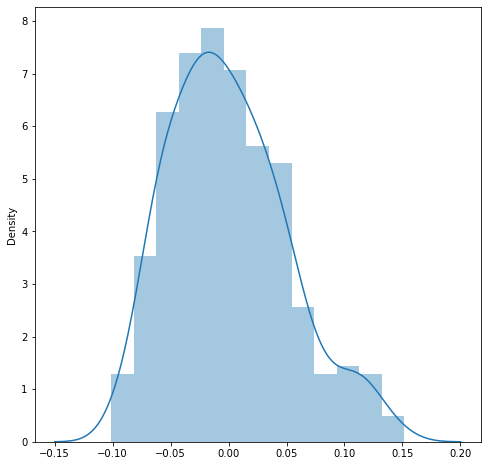

In [122]:
plt.figure(figsize = (8,8))
sns.distplot(res);

In [123]:
#KNN model
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


In [124]:
# #X_train_sm = sm.add_constant(_train)
# x_test = sm.add_constant(X_test)
# from sklearn.neighbors import KNeighborsRegressor
# reg = KNeighborsRegressor(n_neighbors=3)
# reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True, fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [130]:
X_train.shape

(320, 9)

In [131]:
from sklearn.metrics import mean_absolute_error
#y_predicted = model.predict(X_train)

Student
0    AxesSubplot(0.555556,0.125;0.344444x0.18875)
1    AxesSubplot(0.555556,0.125;0.344444x0.18875)
Name: Age, dtype: object

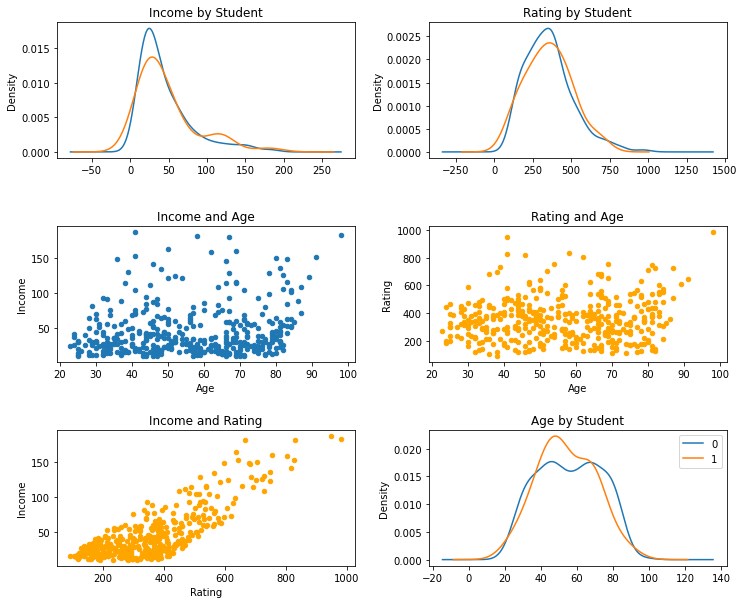

In [139]:
f, axes = plt.subplots(3, 2, figsize=(12, 10))
f.subplots_adjust(hspace=.5, wspace=.25)
df.groupby('Student').Income.plot(kind='kde', ax=axes[0][0], title='Income by Student')
df.groupby('Student').Rating.plot(kind='kde', ax=axes[0][1], title='Rating by Student')
df.plot(kind='scatter', x='Age' , y='Income' , ax=axes[1][0], title='Income and Age')
df.plot(kind='scatter', x='Age' , y='Rating' , ax=axes[1][1], color='orange', title='Rating and Age')
df.plot(kind='scatter', x='Rating' , y='Income' , ax=axes[2][0], color='orange', title='Income and Rating')
df.groupby('Student').Age.plot(kind='kde', ax=axes[2][1], legend=True, title='Age by Student')

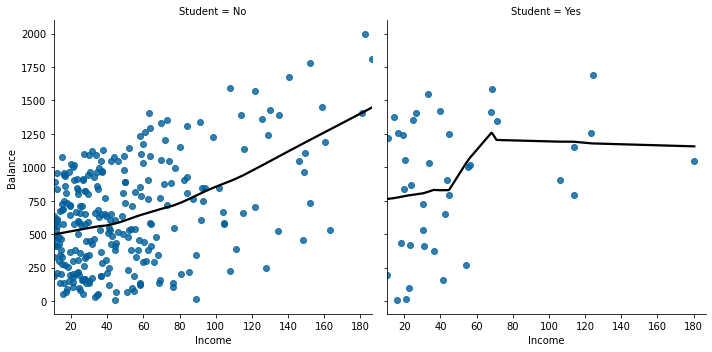

In [66]:
sns.lmplot(x='Income',
          y='Balance',
          data=active_credit_df,
          line_kws={'color':'black'},
          lowess=True,
          col='Student')

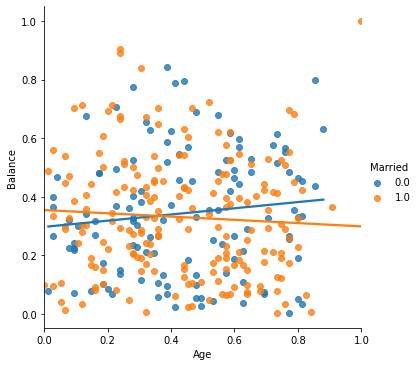

In [310]:
sns.lmplot(x="Age", 
           y="Balance", 
           hue="Married", 
           ci=None,
           data=active_credit_df);

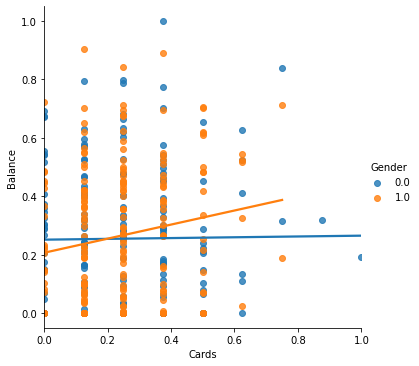

In [311]:
sns.lmplot(x="Cards", 
           y="Balance", 
           hue="Gender", 
           ci=None,
           data = credit_df);


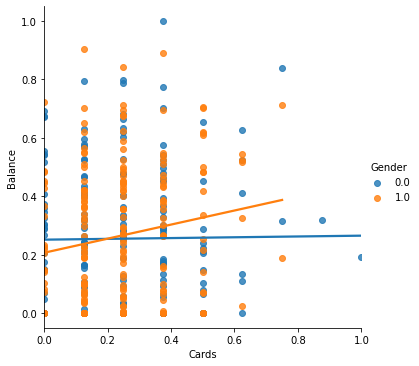

In [312]:
sns.lmplot(x="Cards", 
           y="Balance", 
           hue="Gender", 
           ci=None,
           data = credit_df);


<AxesSubplot:xlabel='Limit', ylabel='Balance'>

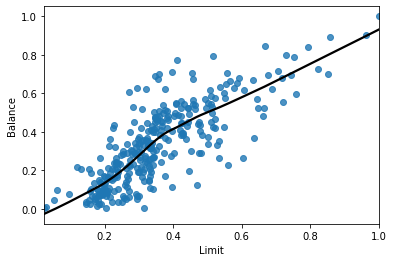

In [313]:
sns.regplot(x='Limit',
          y='Balance',
          data=active_credit_df,
          line_kws={'color':'black'},
          lowess=True)


In [141]:
active_credit_df = df.loc[df.Balance>0,].copy()
active_credit_df.Balance.describe() 

count     310.000000
mean      670.987097
std       413.904019
min         5.000000
25%       338.000000
50%       637.500000
75%       960.750000
max      1999.000000
Name: Balance, dtype: float64

In [142]:
active_credit_df.shape

(310, 12)

In [144]:
#Split data train/test
data_train2, data_test2 = train_test_split(active_credit_df, train_size=0.8, test_size =0.2, random_state = 100)

In [150]:
#Chane More input varience
#X_train = data_train[["Income","Limit","Rating","Cards","Age","Education","Student","Married","Ethnicity","Gender"]]
X_train2 = active_credit_df[["Income","Rating","Cards","Age","Education","Student","Married","Ethnicity","Gender"]]

In [152]:
y_train2 = active_credit_df.pop("Balance")

In [155]:
X_train_sm2 = sm.add_constant(X_train2)
lr = sm.OLS(y_train2, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2135.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          3.75e-266
Time:                        12:38:58   Log-Likelihood:                -1660.2
No. Observations:                 310   AIC:                             3340.
Df Residuals:                     300   BIC:                             3378.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -790.7155     21.157    -37.374      0.000    -832.350    -749.081
Income        -9.7151      0.145    -66.950      0.000     -10.001      -9.430
Rating         4.7775      0.040    120.766      0.000       4.700       4.855
Cards          3.1314      2.100      1.491      0.137      -1.001       7.264
Age           -1.1465      0.176     -6.508      0.000      -1.493      -0.800
Education      1.3267      0.935      1.419      0.157      -0.514       3.167
Student      478.7066      9.200     52.033      0.000     460.602     496.811
Married      -13.6346      6.185     -2.204      0.028     -25.807      -1.462
Ethnicity     -1.4270      3.578     -0.399      0.690      -8.468       5.613
Gender        -2.4282      5.950     -0.408      0.684     -14.138       9.281
==============================================================================
Omnibus:                        2.626   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.441
Skew:                          -0.144   Prob(JB):                        0.295
Kurtosis:                       2.674   Cond. No.                     3.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""